# **Ecommerce Sentimental Analysis**

# Import all required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from gensim.models import Word2Vec, FastText
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb
from tqdm import tqdm
import regex as re
import string   # used for removing punctations and also for converting lower case of data
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")


In [3]:
#store dataset in ecom variable
ecom=pd.read_csv("/content/drive/MyDrive/Ecommerce Sentiment analysis.csv")

In [4]:
#copy your data in ecom1
ecom1=ecom.copy()

In [5]:
ecom1.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [6]:
#To get information from the data
ecom1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [7]:
#To check the missing null values from dataset
ecom1.isnull().sum()

,0
name,0
brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,10
sentiment,0


In [8]:
ecom1['brand'].unique()

array(['Amazon'], dtype=object)

In [9]:
ecom1['name'].value_counts()

,count
name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",372
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",135


In [10]:
#To see the columns in ecom1
ecom1.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [11]:
#To check different category data
ecom1['categories'].value_counts()

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",372
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",232
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162


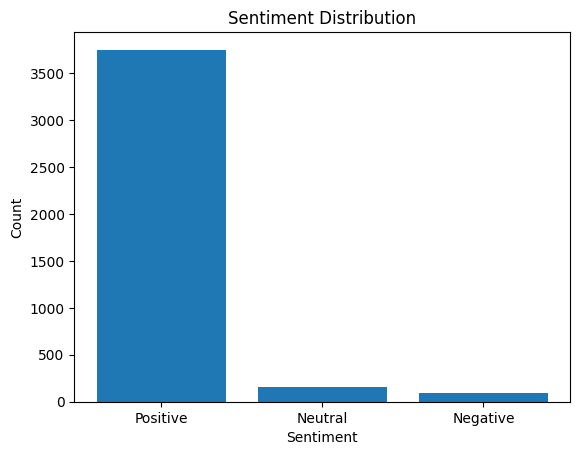

In [12]:
#To analyze the sentiment distribution
sentiment_counts = ecom1['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

In [13]:
#To see which product has highest positive, negative and neutral reviews
ecom1.groupby('sentiment')['name'].agg(lambda x: x.mode()[0]) # or pd.Series.mode

,name
sentiment,
Negative,Amazon Echo Show Alexa-enabled Bluetooth Speak...
Neutral,Amazon Echo Show Alexa-enabled Bluetooth Speak...
Positive,Amazon Echo Show Alexa-enabled Bluetooth Speak...


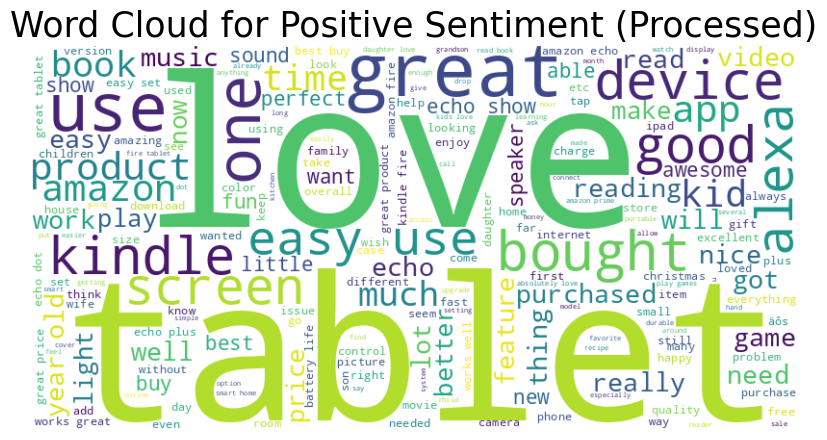

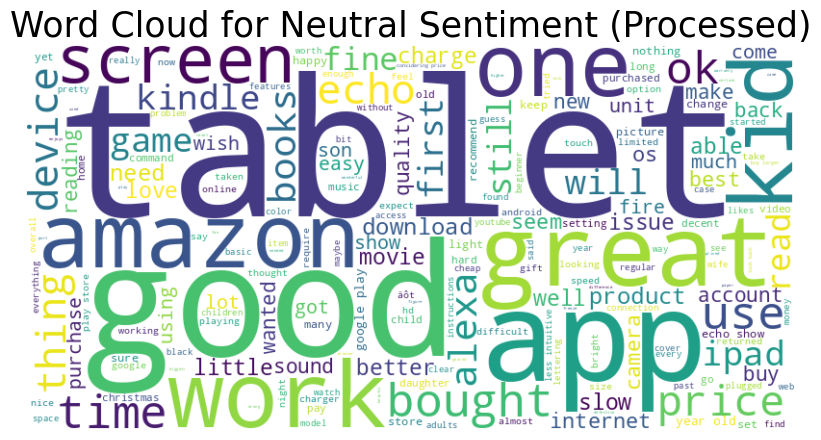

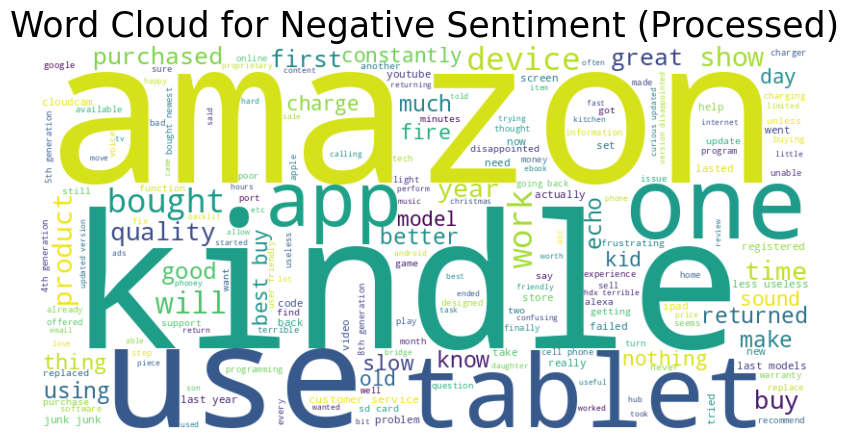

In [14]:
#To understand and can easily understand the word distributions in the data
from wordcloud import STOPWORDS
from wordcloud import WordCloud

def preprocess_text(text_series):
    stopwords = set(STOPWORDS)
    text = " ".join(text_series.dropna().astype(str))
    return " ".join(word.lower() for word in text.split() if word.lower() not in stopwords)

# Generate word clouds for each sentiment after preprocessing
sentiments = ecom1["sentiment"].unique()
for sentimen in sentiments:
    sentiment_data = ecom1[ecom1["sentiment"] == sentimen]["reviews.text"]
    processed_text = preprocess_text(sentiment_data)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(processed_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {sentimen.capitalize()} Sentiment (Processed)", fontsize=25)
    plt.axis("off")
    plt.show()


In [15]:
ecom1.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [16]:
#storing reviews.text and sentiment in ecom2 variable, because these are important columns to predict the output
ecom2=ecom1[['reviews.text','sentiment']]

In [17]:
ecom2.head()

,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


In [18]:
ecom2.shape

(4000, 2)

In [19]:
#importing stopword library to remove stopwords from the data
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Step-2: Cleaning the data


In [20]:
stopwords_list = stopwords.words('english')
exclude = string.punctuation

In [21]:
# Remove punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [22]:
def remove_stopwords(text):
    clean_text = []
    data = [word for word in text.split() if word not in stopwords_list]
    return " ".join(data)

In [23]:
def text_data_cleaning(ecom2):
    ecom2['review_text_original'] = ecom2['reviews.text'].copy()
    ecom2['reviews.text'] = ecom2['reviews.text'].str.lower()
    ecom2['reviews.text'] = ecom2['reviews.text'].apply(remove_punc)
    ecom2['reviews.text'] = ecom2['reviews.text'].apply(remove_stopwords)
    return ecom2


In [24]:
ecom2 = text_data_cleaning(ecom2)
ecom2.head()

,reviews.text,sentiment,review_text_original
0,purchased black fridaypros great price even sa...,Positive,Purchased on Black FridayPros - Great Price (e...
1,purchased two amazon echo plus two dots plus f...,Positive,I purchased two Amazon in Echo Plus and two do...
2,average alexa option show things screen still ...,Neutral,Just an average Alexa option. Does show a few ...
3,good product exactly wanted good price,Positive,"very good product. Exactly what I wanted, and ..."
4,3rd one ive purchased ive bought one nieces ca...,Positive,This is the 3rd one I've purchased. I've bough...


In [25]:
#Tokenization
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
# Tokenization
ecom2['tokens'] = ecom2['reviews.text'].apply(word_tokenize)
ecom2.head()
# For simplicity, we'll tokenize the text by splitting on spaces.
#ecom2['tokens'] = ecom2['reviews.text'].apply(lambda x: x.split())
ecom2.head(10)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,reviews.text,sentiment,review_text_original,tokens
0,purchased black fridaypros great price even sa...,Positive,Purchased on Black FridayPros - Great Price (e...,"[purchased, black, fridaypros, great, price, e..."
1,purchased two amazon echo plus two dots plus f...,Positive,I purchased two Amazon in Echo Plus and two do...,"[purchased, two, amazon, echo, plus, two, dots..."
2,average alexa option show things screen still ...,Neutral,Just an average Alexa option. Does show a few ...,"[average, alexa, option, show, things, screen,..."
3,good product exactly wanted good price,Positive,"very good product. Exactly what I wanted, and ...","[good, product, exactly, wanted, good, price]"
4,3rd one ive purchased ive bought one nieces ca...,Positive,This is the 3rd one I've purchased. I've bough...,"[3rd, one, ive, purchased, ive, bought, one, n..."
5,great product light weight wish wifi download ...,Positive,This is a great product. Light weight. I wish ...,"[great, product, light, weight, wish, wifi, do..."
6,7year old daughter saved brother bought 8gb ye...,Neutral,My 7-year old daughter saved up to by this. He...,"[7year, old, daughter, saved, brother, bought,..."
7,purchased son room upgrade memory allow books ...,Positive,Purchased this for my son. Has room to upgrade...,"[purchased, son, room, upgrade, memory, allow,..."
8,bought mom needed great price wanting get ipad...,Positive,Bought this for my mom and it was just what sh...,"[bought, mom, needed, great, price, wanting, g..."
9,cheap run chrome stuff returned store,Negative,"was cheap, can not run chrome stuff, returned ...","[cheap, run, chrome, stuff, returned, store]"


In [26]:
 # Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
ecom2['tokens'] = ecom2['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
ecom2.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,reviews.text,sentiment,review_text_original,tokens
0,purchased black fridaypros great price even sa...,Positive,Purchased on Black FridayPros - Great Price (e...,"[purchased, black, fridaypros, great, price, e..."
1,purchased two amazon echo plus two dots plus f...,Positive,I purchased two Amazon in Echo Plus and two do...,"[purchased, two, amazon, echo, plus, two, dot,..."
2,average alexa option show things screen still ...,Neutral,Just an average Alexa option. Does show a few ...,"[average, alexa, option, show, thing, screen, ..."
3,good product exactly wanted good price,Positive,"very good product. Exactly what I wanted, and ...","[good, product, exactly, wanted, good, price]"
4,3rd one ive purchased ive bought one nieces ca...,Positive,This is the 3rd one I've purchased. I've bough...,"[3rd, one, ive, purchased, ive, bought, one, n..."


In [27]:
#Drop irrelevant columns
columns_to_drop = [
    'reviews.text','review_text_original'
]

# Remove these columns from the dataset
new_ecom= ecom2.drop(columns=columns_to_drop)
new_ecom.head()

,sentiment,tokens
0,Positive,"[purchased, black, fridaypros, great, price, e..."
1,Positive,"[purchased, two, amazon, echo, plus, two, dot,..."
2,Neutral,"[average, alexa, option, show, thing, screen, ..."
3,Positive,"[good, product, exactly, wanted, good, price]"
4,Positive,"[3rd, one, ive, purchased, ive, bought, one, n..."


# **TFID vectorization**


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

new_ecom['processed_text'] = new_ecom['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(new_ecom['processed_text'])
#ecom2['tfidf_features'] = list(tfidf_features.toarray())






# **FAST TEXT**

In [29]:
def fasttext_format(row):
    return f"__label__{row['sentiment']} {row['processed_text']}"

fasttext_data = new_ecom.apply(fasttext_format, axis=1)

# Save FastText-formatted data to a text file
with open('fasttext_data.txt', 'w') as f:
    f.write("\n".join(fasttext_data))

# Creating vectors in word to vec column

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=new_ecom['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Save Word2Vec model
w2v_model.save("word2vec.model")
# Add Word2Vec vectors as a new column
def get_sentence_vector(tokens):
    return w2v_model.wv[tokens].mean(axis=0) if tokens else None

new_ecom['w2v_vectors'] = new_ecom['tokens'].apply(get_sentence_vector)

In [31]:
new_ecom.head()

,sentiment,tokens,processed_text,w2v_vectors
0,Positive,"[purchased, black, fridaypros, great, price, e...",purchased black fridaypros great price even sa...,"[-0.13227652, 0.30612344, 0.06128049, 0.022438..."
1,Positive,"[purchased, two, amazon, echo, plus, two, dot,...",purchased two amazon echo plus two dot plus fo...,"[-0.14345433, 0.3311254, 0.071022, 0.02189359,..."
2,Neutral,"[average, alexa, option, show, thing, screen, ...",average alexa option show thing screen still l...,"[-0.19064556, 0.42605323, 0.09820539, 0.024421..."
3,Positive,"[good, product, exactly, wanted, good, price]",good product exactly wanted good price,"[-0.17927687, 0.41907224, 0.08629218, 0.012541..."
4,Positive,"[3rd, one, ive, purchased, ive, bought, one, n...",3rd one ive purchased ive bought one niece cas...,"[-0.14789483, 0.3609675, 0.07288477, 0.0340582..."


In [32]:
w2v_model.wv['tablet']

array([-0.22866239,  0.56042725,  0.09740523,  0.05323594,  0.26353332,
       -1.1345541 ,  0.5684573 ,  1.234567  , -0.5689836 , -0.27923673,
       -0.3991199 , -0.84511787,  0.23095253,  0.28685406,  0.25596625,
       -0.5338757 ,  0.01155602, -0.60537356,  0.01943168, -1.4053118 ,
        0.16560072,  0.17715164,  0.26696566, -0.21700566, -0.30811778,
        0.01535608, -0.3285991 , -0.29570413, -0.6021894 , -0.03639133,
        0.5868356 ,  0.01538845,  0.3350066 , -0.4204473 , -0.31258667,
        0.6959568 ,  0.03287554, -0.73715764, -0.11118188, -1.3505204 ,
       -0.00321643, -0.603539  , -0.33858797,  0.22357443,  0.7722372 ,
       -0.24206911, -0.35404631, -0.1725041 ,  0.51704484,  0.17122772,
        0.2463626 , -0.5227958 , -0.00998922, -0.14613524, -0.43969205,
        0.18829575,  0.22400615, -0.13242204, -0.7429485 ,  0.3557107 ,
        0.19817823,  0.09851864, -0.19875868, -0.02410473, -0.8006625 ,
        0.5535447 , -0.01234984,  0.31473333, -0.9034578 ,  0.64

In [33]:
w2v_model.wv.most_similar('love', topn=5)

[('got', 0.9995458722114563),
 ('purchased', 0.9995275139808655),
 ('8', 0.9994352459907532),
 ('5', 0.9994306564331055),
 ('bought', 0.9993774890899658)]

In [34]:
w2v_model.wv.most_similar('cheap', topn=5)

[('could', 0.9989878535270691),
 ('get', 0.9989843964576721),
 ('little', 0.9989698529243469),
 ('store', 0.9989667534828186),
 ('need', 0.998958170413971)]

# Getting average word to vec


In [35]:
# Function to get the average word vector for a document
def get_avg_word_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if not vectors:
        # If no in-vocabulary words are present, return a default vector (zeros in this case)
        return np.zeros(w2v_model.vector_size)
    else:
        return sum(vectors) / len(vectors) # vector representation of sentence


In [36]:
new_ecom2=new_ecom[['tokens','sentiment']]
new_ecom2.head()

,tokens,sentiment
0,"[purchased, black, fridaypros, great, price, e...",Positive
1,"[purchased, two, amazon, echo, plus, two, dot,...",Positive
2,"[average, alexa, option, show, thing, screen, ...",Neutral
3,"[good, product, exactly, wanted, good, price]",Positive
4,"[3rd, one, ive, purchased, ive, bought, one, n...",Positive


 Available dataset is often imbalanced, which can lead to challenges when applying machine learning models. In our case, the dataset predominantly contains positive sentiment data, resulting in higher accuracy for the positive class while other classes suffer. To address this issue and ensure balanced performance across all classes, we performed oversampling on the minority classes. This approach helps mitigate the impact of imbalance and improves the model's ability to generalize across different sentiments.

# Handling imbalanced data

In [37]:
#import required libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [38]:
# Handling Imbalanced Dataset
# Extract features and target
target = new_ecom['sentiment']
features = list(new_ecom['w2v_vectors'])

# Convert features to a proper 2D array
features = [vec for vec in features if vec is not None]
target = target[new_ecom['w2v_vectors'].notnull()]

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
features_resampled, target_resampled = over_sampler.fit_resample(features, target)

# # Undersampling (if required)
# under_sampler = RandomUnderSampler(random_state=42)
# features_resampled, target_resampled = under_sampler.fit_resample(features, target)


In [39]:
import numpy as np

# Combine the resampled features and target into a new DataFrame
ecommerce = pd.DataFrame({
    'w2v_vectors': [np.array(vec).tolist() for vec in features_resampled],  # Convert numpy arrays to lists
    'sentiment': target_resampled
})

# Save the balanced dataset to a CSV file
ecommerce.to_csv('political_balanced_dataset.csv', index=False)

print("Balanced dataset saved to 'political_balanced_dataset.csv'")


Balanced dataset saved to 'political_balanced_dataset.csv'


In [40]:
#After over sampled technique is used, the values of each sentiment are equal
ecommerce['sentiment'].value_counts()

,count
sentiment,
Positive,3749
Neutral,3749
Negative,3749


# Getting Average vector for each

In [41]:
import numpy as np

# Function to calculate the average word vector for each document
def compute_average_word_vector(w2v_vectors):
    average_vectors = []
    for vec_list in w2v_vectors:
        # Convert the list of word vectors into a numpy array
        vec_array = np.array(vec_list)

        # Check if vec_array is not empty
        if vec_array.size > 0:
            # Calculate the average of word vectors for the document
            avg_vec = np.mean(vec_array, axis=0)
        else:
            # Handle empty vector list (optional, can be customized as needed)
            avg_vec = np.zeros(vec_list[0].shape)  # Assuming all word vectors are of the same shape

        average_vectors.append(avg_vec)

    return np.array(average_vectors)

# Apply the function to the 'w2v_vectors' column to get average word vectors
average_word_vectors = compute_average_word_vector(ecommerce['w2v_vectors'])

# Convert average_word_vectors into a DataFrame or use it directly for model fitting
# If you plan to use it for model fitting, ensure it's a 2D array
X = average_word_vectors  # Features (average word vectors)
y = ecommerce['sentiment']  # Target variable

# Now X is a 2D array (N x D) where N is the number of documents and D is the size of the word vector
print("Average word vectors computed and prepared for model fitting.")


Average word vectors computed and prepared for model fitting.


In [42]:
ecommerce.head()

,w2v_vectors,sentiment
0,"[-0.1322765201330185, 0.30612343549728394, 0.0...",Positive
1,"[-0.14345432817935944, 0.331125408411026, 0.07...",Positive
2,"[-0.19064556062221527, 0.4260532259941101, 0.0...",Neutral
3,"[-0.17927686870098114, 0.4190722405910492, 0.0...",Positive
4,"[-0.14789482951164246, 0.3609674870967865, 0.0...",Positive


Applying Machine Learning model for this sentimental data

# 1.RANDOM FOREST

Training accuracy: 93.49%
Test accuracy: 92.00%
Overall model accuracy: 93.19%

Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.97      0.93      0.95       748
     Neutral       0.85      0.99      0.91       733
    Positive       0.96      0.84      0.90       769

    accuracy                           0.92      2250
   macro avg       0.93      0.92      0.92      2250
weighted avg       0.93      0.92      0.92      2250



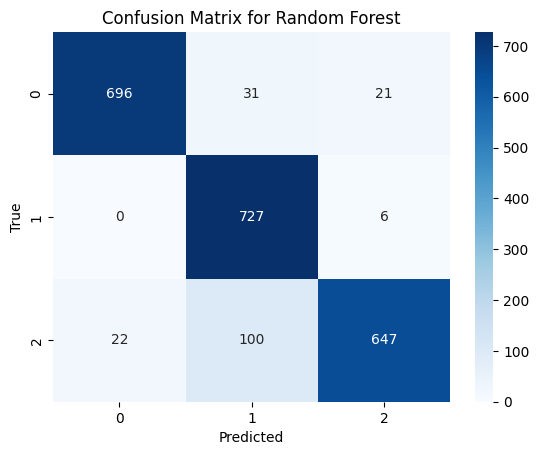

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
X = np.array(ecommerce['w2v_vectors'].tolist())  # Convert list of vectors to 2D array

# Prepare the target variable
y = ecommerce['sentiment'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier with tuned hyperparameters
model = RandomForestClassifier(
    n_estimators=40,  # Decrease the number of trees
    max_depth=7,  # Limit the depth of each tree further
    min_samples_split=6,  # Increase the minimum samples required to split an internal node
    min_samples_leaf=4,  # Increase the minimum samples required to be a leaf node
    max_features=0.5,  # Reduce the number of features considered for splits
    class_weight={'Negative': 0.5, 'Neutral': 1, 'Positive': 1},
    random_state=42
)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
# Calculate the overall accuracy of the model on the test set
#overall_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]),
                                  np.concatenate([y_train_pred, y_test_pred]))


# Print the overall accuracy
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Optional: Additional metrics (Precision, Recall, F1-score) for test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix using Seaborn heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# **2. XG_BOOST**

Training accuracy: 87.42%
Test accuracy: 86.80%
Overall model accuracy: 87.29%

Classification Report (Test Data):
              precision    recall  f1-score   support

    Negative       0.85      1.00      0.92       748
     Neutral       0.84      0.89      0.86       733
    Positive       0.93      0.72      0.81       769

    accuracy                           0.87      2250
   macro avg       0.87      0.87      0.86      2250
weighted avg       0.87      0.87      0.86      2250



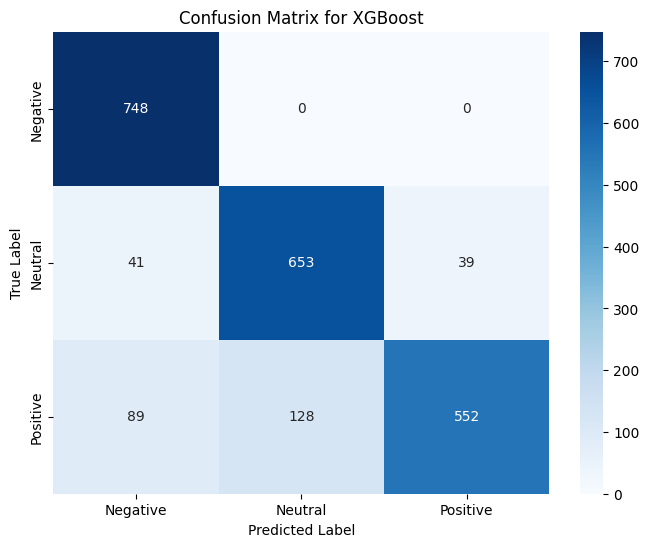

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
x = np.array(ecommerce['w2v_vectors'].tolist())  # Convert list of vectors to 2D array
y = ecommerce['sentiment']

# Use LabelEncoder to convert categorical labels ('neutral', 'partisan') to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'neutral' to 0, 'partisan' to 1

# Split the data into training and testing sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize the XGBoost classifier with adjusted hyperparameters
xgb_model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    alpha=1,              # Increased L1 regularization
    lambda_=7.0,           # Increased L2 regularization
    n_estimators=50,       # Reduced number of trees
    learning_rate=0.05,      # Balanced learning rate
    subsample=0.7,          # Lower subsample for randomness
    colsample_bytree=0.5,   # Lower colsample for randomness
    max_depth=4,            # Shallow trees
    min_child_weight=7 ,
    #class_weight={'Negative': 0.5, 'Neutral': 1, 'Positive': 1}
    # Higher minimum split weight
)

# Train the model using the training data
xgb_model.fit(x_train1, y_train1)

# Make predictions on the training and test sets
y_train1_pred = xgb_model.predict(x_train1)
y_test_pred = xgb_model.predict(x_test1)

# Calculate accuracies
train_accuracy = accuracy_score(y_train1, y_train1_pred)
test_accuracy = accuracy_score(y_test1, y_test_pred)
overall_accuracy = accuracy_score(
    np.concatenate([y_train1, y_test1]),
    np.concatenate([y_train1_pred, y_test_pred])
)

# Print accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test1, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_test_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# **3. LOGISTIC_REGRESSION**

Training accuracy: 77.29%
Test accuracy: 75.47%
Overall model accuracy: 76.93%

Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.79      0.90      0.84       748
     Neutral       0.71      0.69      0.70       733
    Positive       0.76      0.67      0.71       769

    accuracy                           0.75      2250
   macro avg       0.75      0.76      0.75      2250
weighted avg       0.75      0.75      0.75      2250



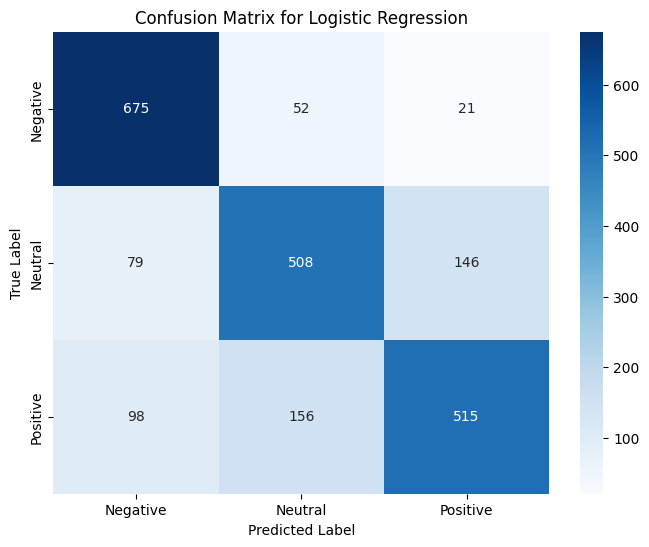

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
X = np.array(ecommerce['w2v_vectors'].tolist())  # Convert list of vectors to 2D array
y = ecommerce['sentiment'].values  # Target variable

# Use LabelEncoder to convert categorical labels ('neutral', 'partisan') to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'neutral' to 0, 'partisan' to 1

# Standardize the feature vectors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train3, x_test3, y_train3, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier with hyperparameter tuning
logreg_model = LogisticRegression(
    C=1000,                 # Regularization strength (smaller value -> stronger regularization)
    solver='lbfgs',        # Solver for optimization
    max_iter=1500,         # Increased iterations for convergence
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the model using the training data
logreg_model.fit(x_train3, y_train3)

# Make predictions on the training set
y_train_pred = logreg_model.predict(x_train3)

# Make predictions on the test set
y_test_pred = logreg_model.predict(x_test3)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train3, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Calculate and print the overall model accuracy on the test set
#overall_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(
    np.concatenate([y_train3, y_test]),
    np.concatenate([y_train_pred, y_test_pred])
)

print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# **4. DECISION_TREE**

Training accuracy: 85.10%
Test accuracy: 82.98%
Overall model accuracy: 84.67%

Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.88      0.96      0.91       748
     Neutral       0.77      0.86      0.81       733
    Positive       0.84      0.68      0.75       769

    accuracy                           0.83      2250
   macro avg       0.83      0.83      0.83      2250
weighted avg       0.83      0.83      0.83      2250



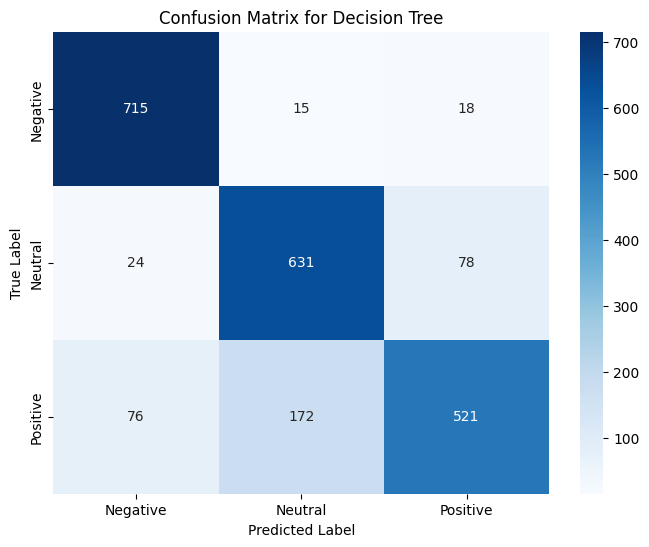

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
X = np.array(ecommerce['w2v_vectors'].tolist())  # Convert list of vectors to 2D array

# Prepare the target variable (encode labels to numeric values)
y = ecommerce['sentiment'].values  # Target variable

# Use LabelEncoder to convert categorical labels ('neutral', 'partisan') to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'neutral' to 0, 'partisan' to 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42,max_depth=8,max_features=0.5)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt_model.predict(X_train)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Calculate and print the overall model accuracy on the test set
#overall_accuracy = accuracy_score(y_test, y_test_pred)
overall_accuracy = accuracy_score(
    np.concatenate([y_train, y_test]),
    np.concatenate([y_train_pred, y_test_pred])
)
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Optional: Additional metrics (Precision, Recall, F1-score) for the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix (Optional for visualization)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **5. NAIVE_BAYES**

Training accuracy: 47.47%
Test accuracy: 48.67%
Overall model accuracy: 48.67%

Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.50      0.59      0.54       748
     Neutral       0.39      0.33      0.36       733
    Positive       0.56      0.53      0.54       769

    accuracy                           0.49      2250
   macro avg       0.48      0.49      0.48      2250
weighted avg       0.48      0.49      0.48      2250



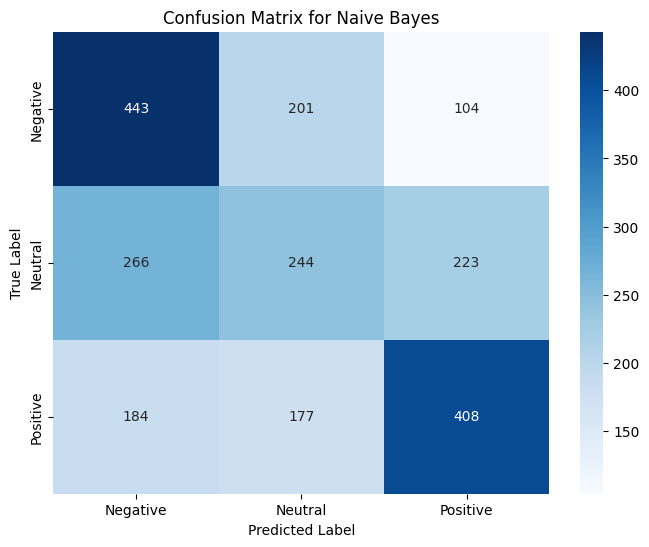

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ensure that 'avg_w2v_vectors' are 1D vectors for each document
X = np.array(ecommerce['w2v_vectors'].tolist())  # Convert list of vectors to 2D array

# Prepare the target variable (encode labels to numeric values)
y = ecommerce['sentiment'].values  # Target variable

# Use LabelEncoder to convert categorical labels ('neutral', 'partisan') to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the feature vectors using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model using the training data
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = nb_model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = nb_model.predict(X_test_scaled)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Calculate and print the overall model accuracy on the test set
overall_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Overall model accuracy: {overall_accuracy * 100:.2f}%")

# Optional: Additional metrics (Precision, Recall, F1-score) for the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# **TABLE FOR ALL MODEL ACCURACIES**

                 Model  Training Accuracy (%)  Test Accuracy (%)  \
0        Random Forest                  94.20              92.89   
1        Decision Tree                  88.64              86.27   
2              XGBoost                  88.35              87.07   
3  Logistic Regression                  74.71              74.27   
4          Naive Bayes                  48.42              49.20   

   Overall Model Accuracy (%)  
0                       93.94  
1                       88.17  
2                       88.09  
3                       74.62  
4                       49.20  


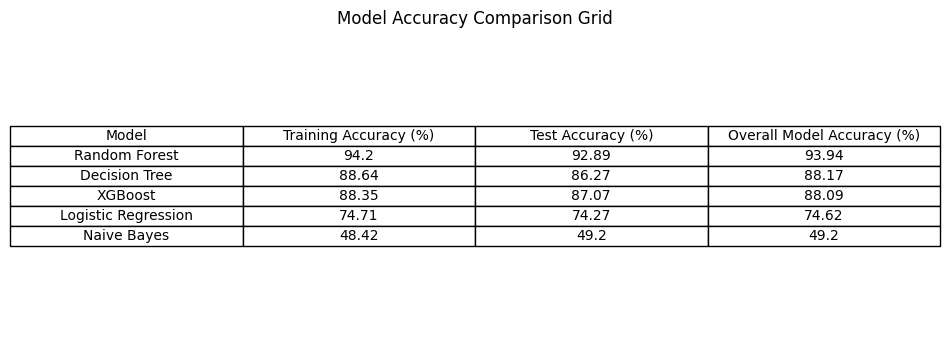

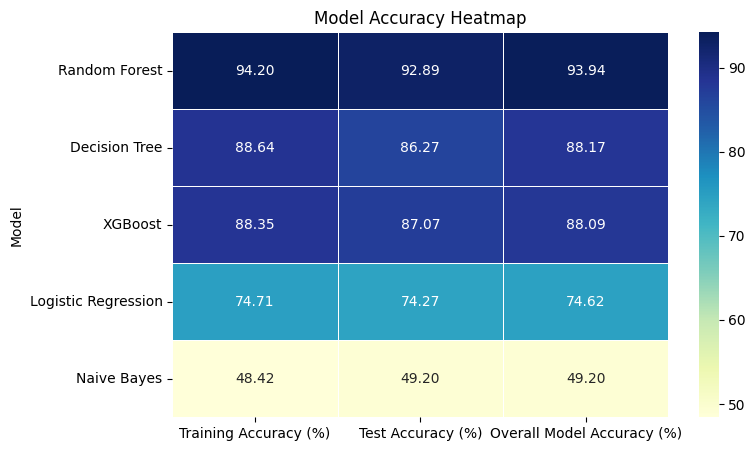

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the table
data = {
    "Model": [
        "Random Forest",
        "XGBoost",
        "Logistic Regression",
        "Decision Tree",
        "Naive Bayes"
    ],
    "Training Accuracy (%)": [94.20, 88.35, 74.71, 88.64, 48.42],
    "Test Accuracy (%)": [92.89, 87.07, 74.27, 86.27, 49.20],
    "Overall Model Accuracy (%)": [93.94, 88.09, 74.62, 88.17, 49.20]
}

# Creating a DataFrame and sorting by Overall Model Accuracy
accuracy_df = pd.DataFrame(data)
accuracy_df_sorted = accuracy_df.sort_values(by='Overall Model Accuracy (%)', ascending=False).reset_index(drop=True)

# Display sorted table as text
print(accuracy_df_sorted)

# Plot the table in grid format
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size for better appearance
ax.axis('tight')
ax.axis('off')

# Create a table
table_data = [accuracy_df_sorted.columns.tolist()] + accuracy_df_sorted.values.tolist()
table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

# Styling the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust table size

# Title
plt.title("Model Accuracy Comparison Grid", fontsize=12)
plt.show()

# Heatmap visualization for better comparison
plt.figure(figsize=(8, 5))
sns.heatmap(accuracy_df_sorted.set_index('Model'), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Model Accuracy Heatmap")
plt.show()


# **CONCLUSION**

Based on the provided data, **Random Forest** is the best-performing model, achieving the highest Training Accuracy (94.20%), Test Accuracy (92.89%), and Overall Accuracy (93.94%), indicating excellent predictive power and generalization. While **XGBoost** (88.09% overall accuracy) and **Decision Tree** (88.17% overall accuracy) are reasonable alternatives with slightly lower performance, they are less robust than Random Forest. In contrast, **Logistic Regression** (74.62% overall accuracy) and **Naive Bayes** (49.20% overall accuracy) perform significantly worse and are not suitable for this dataset.

Validation for new reviews using Random Forest technique

In [48]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [62]:


# Function to preprocess new text data
def preprocess_new_text(new_text, model):  # Pass the FastText model as an argument
    """Preprocesses new text data to prepare it for prediction."""
    new_text = new_text.lower()
    new_text = re.sub(r'[^\w\s]', '', new_text)
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    new_text = re.sub(r'\d+', '', new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in stop_words])
    tokens = word_tokenize(new_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Get average word vector using the provided FastText model
    word_vector = get_avg_word_vector(tokens, w2v_model) # Use the provided model

    return word_vector


# Function to get the average word vector (modified to use the provided model)
def get_avg_word_vector(tokens, model):  # Pass the FastText model as an argument
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors)


# Example of predicting sentiment for new data
new_text = "good product"

# Preprocess the new text and get the word vector
new_text_vector = preprocess_new_text(new_text, w2v_model) # Pass the FastText model

# Reshape the vector to a 2D array (required by the model)
new_text_vector = new_text_vector.reshape(1, -1)

# Predict the sentiment
predicted_sentiment = model.predict(new_text_vector)[0]

# Map the predicted sentiment to a label
#sentiment_labels = {0: 'Neutral', 1: 'Negative', 2: 'Positive'}
#predicted_sentiment_label = sentiment_labels[predicted_sentiment]
predicted_sentiment_label = predicted_sentiment
print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Positive


In [61]:
def get_w2v_vector(review, model): # Add the w2v_model as an argument
    # Assuming you have a word2vec model and function to generate the embedding for the review
    # For example, you might use averaging word embeddings (here as a placeholder)
    # You will need to replace this with the actual implementation based on your word2vec setup
    words = review.lower().split()
    vector = np.zeros(model.vector_size)  # Assuming word2vec vectors are 300-dim
    for word in words:
        if word in model.wv:  # Use the w2v_model.wv to access word vectors
            vector += model.wv[word]
    return vector / len(words) if len(words) > 0 else vector

# New review to be predicted
new_review = "worst product i have ever seen"

# Preprocess the new review to get its word2vec vector
# Pass the w2v_model to the function
new_review_vector = get_w2v_vector(new_review, w2v_model)  # Convert review to word2vec vector

# Ensure the vector is in the right shape (1D array)
new_review_vector = np.array(new_review_vector).reshape(1, -1)

# Use the trained Random Forest model to predict the sentiment
predicted_sentiment = model.predict(new_review_vector)

# Print the predicted sentiment
print(f"Predicted sentiment for the review '{new_review}': {predicted_sentiment[0]}")

Predicted sentiment for the review 'worst product i have ever seen': Negative
